# SciPy Distribution Example

This example shows how to use any of the SciPy distributions in `Pystra`. 
Here, we develop a simple model using the Generalized Extreme Value distribution.

Start off with the necessary imports:

In [7]:
import pystra as pr
from scipy.stats import genextreme as gev

Define the limit state function

In [8]:
def lsf(X1, X2, C):
    return X1 - X2 - C

Create the GEV variable and plot that it is defined as intended:

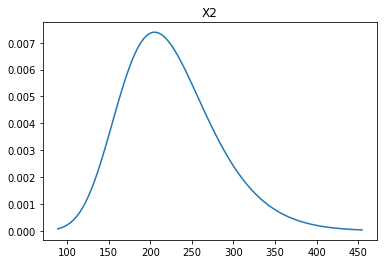

In [9]:
X2 = pr.ScipyDist("X2", gev(c=0.1, loc=200, scale=50))
X2.plot()

Now create the limit state and stochastic model objects, and add the varaiables

In [10]:
limit_state = pr.LimitState(lsf)

model = pr.StochasticModel()
model.addVariable(pr.Normal("X1", 500, 100))
model.addVariable(X2)
model.addVariable(pr.Constant("C", 50))

Suppress the console output

In [11]:
options = pr.AnalysisOptions()
options.setPrintOutput(False)

Execute a FORM analysis

In [12]:
form = pr.Form(stochastic_model=model, limit_state=limit_state, analysis_options=options)
form.run()
form.showDetailedOutput()


FORM
Pf              	 2.4939239502e-02
BetaHL          	 1.9610046625
Model Evaluations 	 39
------------------------------------------------------
Variable   	    U_star 	       X_star 	     alpha
X1         	 -1.592128 	   340.787183 	 -0.811736
X2         	  1.144844 	   290.787242 	 +0.584025
C          	       --- 	    50.000000 	       ---



And then a SORM analysis (passing the existing FORM object for eficiency)

In [13]:
sorm = pr.Sorm(stochastic_model=model, limit_state=limit_state, form=form)
sorm.run()
sorm.showDetailedOutput()



RESULTS FROM RUNNING SECOND ORDER RELIABILITY METHOD

Generalized reliability index:  1.9257163705247708
Probability of failure:         0.027069899329046212

Curavture 1: -0.07711553440911698


FORM/SORM
Pf FORM         		 2.4939239502e-02
Pf SORM Breitung 		 2.7069899329e-02
Pf SORM Breitung HR 	 2.7546692546e-02
Beta_HL         		 1.9610046625
Beta_G Breitung 		 1.9257163705
Beta_G Breitung HR 		 1.9181390266
Model Evaluations 		 48
------------------------------------------------------
Curvature 1: -0.07711553440911698
------------------------------------------------------
Variable   	    U_star 	       X_star 	     alpha
X1         	 -1.592128 	   340.787183 	 -0.811736
X2         	  1.144844 	   290.787242 	 +0.584025
C          	       --- 	    50.000000 	       ---

